# Assignment3

### Load data

By using os libraries, we load data and creat the label from the file names

In [3]:
from __future__ import print_function, absolute_import, division, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
def plot_graphs(histroy, string):
    plt.plot(histroy.history[string])
    plt.plot(histroy.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

train_pos_path = './aclImdb/train/pos/'

train_neg_path = './aclImdb/train/neg/'
test_pos_path = './aclImdb/test/pos/'
test_neg_path = './aclImdb/test/neg/'

train_data = []
train_label = []
test_data = []
test_label = []
train_dir = os.listdir(train_pos_path)+os.listdir(train_neg_path)
for filename in train_dir:
    flag = int(filename.split('_')[-1].split('.')[-2])
    if(flag >= 5):
        train_label.append(1)
        train_data.append(open(train_pos_path+filename).read())
    else:
        train_label.append(0)
        train_data.append(open(train_neg_path+filename).read())

test_dir = os.listdir(test_pos_path)+os.listdir(test_neg_path)
for filename in test_dir:
    flag = int(filename.split('_')[-1].split('.')[-2])
    if(flag >= 5):
        test_label.append(1)
        test_data.append(open(test_pos_path+filename).read())
    else:
        test_label.append(0)
        test_data.append(open(test_neg_path+filename).read())

In [19]:
train_pos_path = './aclImdb/train/pos/'
train_neg_path = './aclImdb/train/neg/'
test_pos_path = './aclImdb/test/pos/'
test_neg_path = './aclImdb/test/neg/'
import os
train_dir = os.listdir(train_pos_path)+os.listdir(train_neg_path)
max_num = 0

for filename in train_dir:
    flag = int(filename.split('_')[-1].split('.')[-2])
    if(flag >= 5):
        with open(train_pos_path+filename, encoding='utf8') as file_obj:
            contents = file_obj.read()
            words = contents.split()
            num_words = len(words)
            if (max_num < num_words):
                max_num = num_words
                f = filename
    else:
        with open(train_neg_path+filename, encoding='utf8') as file_obj:
            contents = file_obj.read()
            words = contents.split()
            num_words = len(words)
            if (max_num < num_words):
                max_num = num_words
                f = filename
        
print(max_num)
print(f)

2470
1175_9.txt


In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



max_length = 500
tokenizer = Tokenizer(num_words = max_length, split = (' '))
total_reviews = train_data + test_data
tokenizer.fit_on_texts(total_reviews)

X_train = tokenizer.texts_to_sequences(train_data)
X_train_pad = pad_sequences(X_train, maxlen = max_length)

X_test = tokenizer.texts_to_sequences(test_data)
X_test_pad = pad_sequences(X_test, maxlen = max_length)

# add validation
shuffle_index =  np.random.permutation(25000)
X_val, Y_val = X_test_pad[:8333], test_label[:8333]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, SpatialDropout1D, SimpleRNN
from sklearn.metrics import classification_report
vocab_size = len(tokenizer.word_index) + 1
X_train_pad.shape

Vanilla RNN model

In [ ]:
def model_vrnn(dim, lr):
    model1 = Sequential()
    model1.add(Embedding(vocab_size, 20, input_length=500))
    model1.add(SpatialDropout1D(rate = 0.3))
    model1.add(SimpleRNN(dim))
    model1.add(Dense(2, activation = 'softmax'))
    model1.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    model1.summary()
    return model1

LSTM model

In [17]:
def lstm(dim, lr):
    model = Sequential()
    model.add(Embedding(vocab_size, dim, input_length = 500))
    model.add(SpatialDropout1D(rate = 0.3))
    model.add(LSTM(dim, dropout = 0.3, recurrent_dropout = 0.3))
    model.add(Dense(2, activation = 'softmax'))
    model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    model.summary()
    return model

### Vanilla RNN

In [27]:
# dim = 20
model_r20 = model_vrnn(20,1e-3) 

history_r20 = model_r20.fit(X_train_pad, train_label, batch_size = 128, epochs = 10, validation_data = (X_val, Y_val))


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 500, 20)           2485060   
_________________________________________________________________
spatial_dropout1d_12 (Spatia (None, 500, 20)           0         
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 20)                820       
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 42        
Total params: 2,485,922
Trainable params: 2,485,922
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 8333 samples
Epoch 1/10
25000/25000 [==============================] - 34s 1ms/sample - loss: 0.6890 - acc: 0.5368 - val_loss: 0.6605 - val_acc: 0.6619
Epoch 2/10
25000/25000 [=============================

In [29]:
# dim = 20
model_r201 = model_vrnn(20,1e-4) 

history_r201 = model_r201.fit(X_train_pad, train_label, batch_size = 128, epochs = 10, validation_data = (X_val, Y_val))


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 500, 20)           2485060   
_________________________________________________________________
spatial_dropout1d_13 (Spatia (None, 500, 20)           0         
_________________________________________________________________
simple_rnn_13 (SimpleRNN)    (None, 20)                820       
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 42        
Total params: 2,485,922
Trainable params: 2,485,922
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 8333 samples
Epoch 1/10
25000/25000 [==============================] - 34s 1ms/sample - loss: 0.6908 - acc: 0.5352 - val_loss: 0.5870 - val_acc: 0.8262
Epoch 2/10
25000/25000 [=============================

In [30]:
# with 1e-4 lr
prediction = model_r201.predict_classes(X_test_pad)
print(classification_report(prediction, test_label))
acc, loss = model_r201.evaluate(X_test_pad, test_label)

              precision    recall  f1-score   support

           0       0.73      0.86      0.79     10701
           1       0.88      0.77      0.82     14299

    accuracy                           0.80     25000
   macro avg       0.80      0.81      0.80     25000
weighted avg       0.82      0.80      0.81     25000

25000/25000 [==============================] - 60s 2ms/sample - loss: 0.4365 - acc: 0.8047


In [26]:
# with 1e-2 lr
acc, loss = model_r20.evaluate(X_test_pad, test_label)

25000/25000 [==============================] - 69s 3ms/sample - loss: 0.6807 - acc: 0.5665


In [28]:
# with 1e-3 lr
acc, loss = model_r20.evaluate(X_test_pad, test_label)

25000/25000 [==============================] - 60s 2ms/sample - loss: 0.4213 - acc: 0.8146


In [22]:
# dim = 50
# lr = (1e-3)
model_r50 = model_vrnn(50,1e-3) 
history_r50 = model_r50.fit(X_train_pad, train_label, batch_size = 128, epochs = 10, validation_data = (X_val, Y_val))


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 500, 20)           2485060   
_________________________________________________________________
spatial_dropout1d_10 (Spatia (None, 500, 20)           0         
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 50)                3550      
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 102       
Total params: 2,488,712
Trainable params: 2,488,712
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 8333 samples
Epoch 1/10
25000/25000 [==============================] - 35s 1ms/sample - loss: 0.6235 - acc: 0.6284 - val_loss: 0.3964 - val_acc: 0.8375
Epoch 2/10
25000/25000 [=============================

In [24]:
acc, loss = model_r50.evaluate(X_test_pad, test_label)
print(acc)
print(loss)

25000/25000 [==============================] - 62s 2ms/sample - loss: 0.6312 - acc: 0.6259
0.6312205806446075
0.62592


In [31]:
# dim = 50

model_r50 = model_vrnn(50,1e-4) 
history_r50 = model_r50.fit(X_train_pad, train_label, batch_size = 128, epochs = 10, validation_data = (X_val, Y_val))
acc, loss = model_r50.evaluate(X_test_pad, test_label)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 500, 20)           2485060   
_________________________________________________________________
spatial_dropout1d_14 (Spatia (None, 500, 20)           0         
_________________________________________________________________
simple_rnn_14 (SimpleRNN)    (None, 50)                3550      
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 102       
Total params: 2,488,712
Trainable params: 2,488,712
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 8333 samples
Epoch 1/10
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.7005 - acc: 0.4976 - val_loss: 0.7359 - val_acc: 0.2348
Epoch 2/10
25000/25000 [=============================

In [32]:
# dim = 50

model_r50 = model_vrnn(50,1e-2) 
history_r50 = model_r50.fit(X_train_pad, train_label, batch_size = 128, epochs = 10, validation_data = (X_val, Y_val))
acc, loss = model_r50.evaluate(X_test_pad, test_label)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 500, 20)           2485060   
_________________________________________________________________
spatial_dropout1d_15 (Spatia (None, 500, 20)           0         
_________________________________________________________________
simple_rnn_15 (SimpleRNN)    (None, 50)                3550      
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 102       
Total params: 2,488,712
Trainable params: 2,488,712
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 8333 samples
Epoch 1/10
25000/25000 [==============================] - 35s 1ms/sample - loss: 0.6643 - acc: 0.5894 - val_loss: 0.5727 - val_acc: 0.7463
Epoch 2/10
25000/25000 [=============================

In [33]:
# dim = 100
# lr = (1e-5)
model_r100 = model_vrnn(100,1e-5) 
history_r100 = model_r100.fit(X_train_pad, train_label, batch_size = 128, epochs = 5, validation_data = (X_val, Y_val))
acc, loss = model_r100.evaluate(X_test_pad, test_label)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 500, 20)           2485060   
_________________________________________________________________
spatial_dropout1d_16 (Spatia (None, 500, 20)           0         
_________________________________________________________________
simple_rnn_16 (SimpleRNN)    (None, 100)               12100     
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 202       
Total params: 2,497,362
Trainable params: 2,497,362
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 8333 samples
Epoch 1/5
25000/25000 [==============================] - 37s 1ms/sample - loss: 0.6974 - acc: 0.5052 - val_loss: 0.6957 - val_acc: 0.5092
Epoch 2/5
25000/25000 [==============================]

In [34]:
model_r100 = model_vrnn(100,1e-4) 
history_r100 = model_r100.fit(X_train_pad, train_label, batch_size = 128, epochs = 5, validation_data = (X_val, Y_val))
acc, loss = model_r100.evaluate(X_test_pad, test_label)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 500, 20)           2485060   
_________________________________________________________________
spatial_dropout1d_17 (Spatia (None, 500, 20)           0         
_________________________________________________________________
simple_rnn_17 (SimpleRNN)    (None, 100)               12100     
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 202       
Total params: 2,497,362
Trainable params: 2,497,362
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 8333 samples
Epoch 1/5
25000/25000 [==============================] - 33s 1ms/sample - loss: 0.6943 - acc: 0.5154 - val_loss: 0.6104 - val_acc: 0.9635
Epoch 2/5
25000/25000 [==============================]

In [35]:
model_r100 = model_vrnn(100,1e-3) 
history_r100 = model_r100.fit(X_train_pad, train_label, batch_size = 128, epochs = 5, validation_data = (X_val, Y_val))
acc, loss = model_r100.evaluate(X_test_pad, test_label)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 500, 20)           2485060   
_________________________________________________________________
spatial_dropout1d_18 (Spatia (None, 500, 20)           0         
_________________________________________________________________
simple_rnn_18 (SimpleRNN)    (None, 100)               12100     
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 202       
Total params: 2,497,362
Trainable params: 2,497,362
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 8333 samples
Epoch 1/5
25000/25000 [==============================] - 33s 1ms/sample - loss: 0.6915 - acc: 0.5264 - val_loss: 0.7524 - val_acc: 0.2399
Epoch 2/5
25000/25000 [==============================]

In [36]:
# dim = 200
# lr = (1e-4)
model_r200 = model_vrnn(200,1e-4) 
history_r200 = model_r200.fit(X_train_pad, train_label, batch_size = 128, epochs = 5, validation_data = (X_val, Y_val))
acc, loss = model_r200.evaluate(X_test_pad, test_label)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 500, 20)           2485060   
_________________________________________________________________
spatial_dropout1d_19 (Spatia (None, 500, 20)           0         
_________________________________________________________________
simple_rnn_19 (SimpleRNN)    (None, 200)               44200     
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 402       
Total params: 2,529,662
Trainable params: 2,529,662
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 8333 samples
Epoch 1/5
25000/25000 [==============================] - 33s 1ms/sample - loss: 0.6946 - acc: 0.5112 - val_loss: 0.7035 - val_acc: 0.4750
Epoch 2/5
25000/25000 [==============================]

In [37]:
# dim = 200
model_r200 = model_vrnn(200,1e-5) 
history_r200 = model_r200.fit(X_train_pad, train_label, batch_size = 128, epochs = 5, validation_data = (X_val, Y_val))
acc, loss = model_r200.evaluate(X_test_pad, test_label)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 500, 20)           2485060   
_________________________________________________________________
spatial_dropout1d_20 (Spatia (None, 500, 20)           0         
_________________________________________________________________
simple_rnn_20 (SimpleRNN)    (None, 200)               44200     
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 402       
Total params: 2,529,662
Trainable params: 2,529,662
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 8333 samples
Epoch 1/5
25000/25000 [==============================] - 33s 1ms/sample - loss: 0.6976 - acc: 0.4983 - val_loss: 0.6933 - val_acc: 0.5214
Epoch 2/5
25000/25000 [==============================]

In [38]:
# dim = 200
model_r200 = model_vrnn(200,1e-3) 
history_r200 = model_r200.fit(X_train_pad, train_label, batch_size = 128, epochs = 5, validation_data = (X_val, Y_val))
acc, loss = model_r200.evaluate(X_test_pad, test_label)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 500, 20)           2485060   
_________________________________________________________________
spatial_dropout1d_21 (Spatia (None, 500, 20)           0         
_________________________________________________________________
simple_rnn_21 (SimpleRNN)    (None, 200)               44200     
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 402       
Total params: 2,529,662
Trainable params: 2,529,662
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 8333 samples
Epoch 1/5
25000/25000 [==============================] - 32s 1ms/sample - loss: 0.7006 - acc: 0.5048 - val_loss: 0.8262 - val_acc: 9.6004e-04
Epoch 2/5
25000/25000 [===========================

In [39]:
# dim = 500
# lr = (1e-5)
model_r500 = model_vrnn(500,1e-5) 
history_r500 = model_r500.fit(X_train_pad, train_label, batch_size = 128, epochs = 5, validation_data = (X_val, Y_val))
acc, loss = model_r500.evaluate(X_test_pad, test_label)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 500, 20)           2485060   
_________________________________________________________________
spatial_dropout1d_22 (Spatia (None, 500, 20)           0         
_________________________________________________________________
simple_rnn_22 (SimpleRNN)    (None, 500)               260500    
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 1002      
Total params: 2,746,562
Trainable params: 2,746,562
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 8333 samples
Epoch 1/5
25000/25000 [==============================] - 34s 1ms/sample - loss: 0.6950 - acc: 0.5057 - val_loss: 0.7270 - val_acc: 0.3132
Epoch 2/5
25000/25000 [==============================]

In [40]:
# dim = 500

model_r500 = model_vrnn(500,1e-6) 
history_r500 = model_r500.fit(X_train_pad, train_label, batch_size = 128, epochs = 5, validation_data = (X_val, Y_val))
acc, loss = model_r500.evaluate(X_test_pad, test_label)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 500, 20)           2485060   
_________________________________________________________________
spatial_dropout1d_23 (Spatia (None, 500, 20)           0         
_________________________________________________________________
simple_rnn_23 (SimpleRNN)    (None, 500)               260500    
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 1002      
Total params: 2,746,562
Trainable params: 2,746,562
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 8333 samples
Epoch 1/5
25000/25000 [==============================] - 35s 1ms/sample - loss: 0.6970 - acc: 0.4985 - val_loss: 0.7000 - val_acc: 0.4849
Epoch 2/5
25000/25000 [==============================]

In [41]:
# dim = 500

model_r500 = model_vrnn(500,1e-4) 
history_r500 = model_r500.fit(X_train_pad, train_label, batch_size = 128, epochs = 5, validation_data = (X_val, Y_val))
acc, loss = model_r500.evaluate(X_test_pad, test_label)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 500, 20)           2485060   
_________________________________________________________________
spatial_dropout1d_24 (Spatia (None, 500, 20)           0         
_________________________________________________________________
simple_rnn_24 (SimpleRNN)    (None, 500)               260500    
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 1002      
Total params: 2,746,562
Trainable params: 2,746,562
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 8333 samples
Epoch 1/5
25000/25000 [==============================] - 34s 1ms/sample - loss: 0.6950 - acc: 0.5014 - val_loss: 0.7146 - val_acc: 0.1729
Epoch 2/5
25000/25000 [==============================]

In [42]:
# dim = 500

model_r500 = model_vrnn(500,1e-3) 
history_r500 = model_r500.fit(X_train_pad, train_label, batch_size = 128, epochs = 5, validation_data = (X_val, Y_val))
acc, loss = model_r500.evaluate(X_test_pad, test_label)

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, 500, 20)           2485060   
_________________________________________________________________
spatial_dropout1d_25 (Spatia (None, 500, 20)           0         
_________________________________________________________________
simple_rnn_25 (SimpleRNN)    (None, 500)               260500    
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 1002      
Total params: 2,746,562
Trainable params: 2,746,562
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 8333 samples
Epoch 1/5
25000/25000 [==============================] - 34s 1ms/sample - loss: 0.7057 - acc: 0.5047 - val_loss: 0.6890 - val_acc: 0.7126
Epoch 2/5
25000/25000 [==============================]

### LSTM

dim=20

In [48]:
# dim=20
model_lr20 = lstm(20,1e-3) 
history_l20 = model_lr20.fit(X_train_pad, train_label, batch_size = 128, epochs = 10, validation_data = (X_val, Y_val))
acc, loss = model_lr20.evaluate(X_test_pad, test_label)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 500, 20)           2485060   
_________________________________________________________________
spatial_dropout1d_28 (Spatia (None, 500, 20)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 42        
Total params: 2,488,382
Trainable params: 2,488,382
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 8333 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
25000/25000 [==============================] - 122s 5ms/sample - loss: 0.6187 - acc: 0.

In [49]:
# dim=20
model_lr20 = lstm(20,1e-2) 
history_l20 = model_lr20.fit(X_train_pad, train_label, batch_size = 128, epochs = 10, validation_data = (X_val, Y_val))
acc, loss = model_lr20.evaluate(X_test_pad, test_label)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 500, 20)           2485060   
_________________________________________________________________
spatial_dropout1d_29 (Spatia (None, 500, 20)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 42        
Total params: 2,488,382
Trainable params: 2,488,382
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 8333 samples
Epoch 1/10
25000/25000 [==============================] - 120s 5ms/sample - loss: 0.5938 - acc: 0.6867 - val_loss: 0.6888 - val_acc: 0.6609
Epoch 2/10
25000/25000 [============================

In [ ]:
# dim=20
model_lr20 = lstm(20,1e-4) 
history_l20 = model_lr20.fit(X_train_pad, train_label, batch_size = 128, epochs = 10, validation_data = (X_val, Y_val))
acc, loss = model_lr20.evaluate(X_test_pad, test_label)

dim=50

In [ ]:
# dim=50
model_lr50 = lstm(50,1e-2) 
history_l20 = model_lr50.fit(X_train_pad, train_label, batch_size = 128, epochs = 10, validation_data = (X_val, Y_val))
acc, loss = model_lr50.evaluate(X_test_pad, test_label)

In [53]:
# dim=50
model_lr20 = lstm(50,1e-3) 
history_l20 = model_lr20.fit(X_train_pad, train_label, batch_size = 128, epochs = 5, validation_data = (X_val, Y_val))
acc, loss = model_lr20.evaluate(X_test_pad, test_label)

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_33 (Embedding)     (None, 500, 50)           6212650   
_________________________________________________________________
spatial_dropout1d_33 (Spatia (None, 500, 50)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 102       
Total params: 6,232,952
Trainable params: 6,232,952
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 8333 samples
Epoch 1/5
25000/25000 [==============================] - 119s 5ms/sample - loss: 0.5821 - acc: 0.6926 - val_loss: 0.3852 - val_acc: 0.8495
Epoch 2/5
25000/25000 [==============================

In [14]:
# dim=50
model_lr50 = lstm(50,1e-4) 
history_l50 = model_lr50.fit(X_train_pad, train_label, batch_size = 128, epochs = 5, validation_data = (X_val, Y_val))
acc, loss = model_lr50.evaluate(X_test_pad, test_label)

dim=100

In [ ]:
# dim=100
model_lr100 = lstm(100,1e-3) 
history_l50 = model_lr100.fit(X_train_pad, train_label, batch_size = 128, epochs = 10, validation_data = (X_val, Y_val))
acc, loss = model_lr100.evaluate(X_test_pad, test_label)

In [20]:
# dim=100
model_lr100 = lstm(100,1e-5) 
history_l100 = model_lr100.fit(X_train_pad, train_label, batch_size = 128, epochs = 10, validation_data = (X_val, Y_val))
acc, loss = model_lr100.evaluate(X_test_pad, test_label)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 200, 100)          12425300  
_________________________________________________________________
spatial_dropout1d_10 (Spatia (None, 200, 100)          0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 202       
Total params: 12,505,902
Trainable params: 12,505,902
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 8333 samples
Epoch 1/10
25000/25000 [==============================] - 51s 2ms/sample - loss: 0.6139 - acc: 0.6598 - val_loss: 0.5730 - val_acc: 0.7222
Epoch 2/10
25000/25000 [===========================

In [ ]:
# dim=100
model_lr100 = lstm(100,1e-4) 
history_l100 = model_lr100.fit(X_train_pad, train_label, batch_size = 128, epochs = 10, validation_data = (X_val, Y_val))
acc, loss = model_lr100.evaluate(X_test_pad, test_label)

dim=200

In [ ]:
# dim=200
model_lr200 = lstm(200,1e-4) 
history_l200 = model_lr200.fit(X_train_pad, train_label, batch_size = 128, epochs = 10, validation_data = (X_val, Y_val))
acc, loss = model_lr200.evaluate(X_test_pad, test_label)

In [ ]:
# dim=200
model_lr200 = lstm(200,1e-5) 
history_l200 = model_lr200.fit(X_train_pad, train_label, batch_size = 128, epochs = 10, validation_data = (X_val, Y_val))
acc, loss = model_lr200.evaluate(X_test_pad, test_label)

In [ ]:
# dim=200
model_lr200 = lstm(200,1e-6) 
history_l200 = model_lr200.fit(X_train_pad, train_label, batch_size = 128, epochs = 10, validation_data = (X_val, Y_val))
acc, loss = model_lr200.evaluate(X_test_pad, test_label)

In [ ]:
model_lr200 = lstm(200,1e-3) 
history_l200 = model_lr200.fit(X_train_pad, train_label, batch_size = 128, epochs = 10, validation_data = (X_val, Y_val))
acc, loss = model_lr200.evaluate(X_test_pad, test_label)

dim=500

In [ ]:
# dim=500
model_lr500 = lstm(500,1e-6) 
history_l500 = model_lr500.fit(X_train_pad, train_label, batch_size = 128, epochs = 10, validation_data = (X_val, Y_val))
acc, loss = model_lr500.evaluate(X_test_pad, test_label)

In [ ]:
# dim=500
model_lr500 = lstm(500,1e-4) 
history_l500 = model_lr500.fit(X_train_pad, train_label, batch_size = 128, epochs = 10, validation_data = (X_val, Y_val))
acc, loss = model_lr500.evaluate(X_test_pad, test_label)

In [ ]:
# dim=500
model_lr500 = lstm(500,1e-5) 
history_l500 = model_lr500.fit(X_train_pad, train_label, batch_size = 128, epochs = 10, validation_data = (X_val, Y_val))
acc, loss = model_lr500.evaluate(X_test_pad, test_label)

In [ ]:
# dim=500
model_lr500 = lstm(500,1e-3) 
history_l500 = model_lr500.fit(X_train_pad, train_label, batch_size = 128, epochs = 10, validation_data = (X_val, Y_val))
acc, loss = model_lr500.evaluate(X_test_pad, test_label)

LSTM model based on mean pooling

In [12]:
from tensorflow.keras.layers import AveragePooling1D,Flatten
lr = 1e-3
dim=100
model_mean = Sequential()
model_mean.add(Embedding(vocab_size, dim, input_length = 500))
model_mean.add(SpatialDropout1D(rate = 0.3))
model_mean.add(LSTM(100, dropout = 0.3, recurrent_dropout = 0.3, return_sequences=True))
model_mean.add(AveragePooling1D(100))
model_mean.add(Flatten())
model_mean.add(Dense(2, activation = 'softmax'))
model_mean.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_mean.summary()

history_mean = model_mean.fit(X_train_pad, train_label, batch_size = 128, epochs = 10, validation_data = (X_val, Y_val))
acc, loss = model_mean.evaluate(X_test_pad, test_label)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 100)          12425300  
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, 500, 100)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 500, 100)          80400     
_________________________________________________________________
average_pooling1d_3 (Average (None, 5, 100)            0         
_________________________________________________________________
flatten (Flatten)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1002      
Total params: 12,506,702
Trainable params: 12,506,702
Non-trainable params: 0
__________________________________________

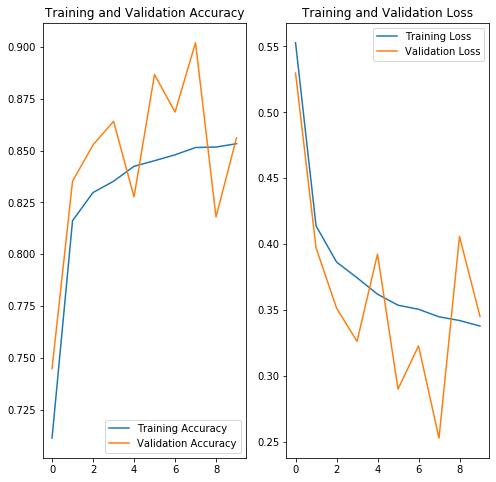

In [15]:
acc = history_mean.history['acc']
val_acc = history_mean.history['val_acc']

loss = history_mean.history['loss']
val_loss = history_mean.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Test models with different dimension for LSTM

In [7]:
historytest = model1.fit(X_train_pad, train_label, batch_size = 128, epochs = 10, validation_data = (X_val, Y_val))

Train on 25000 samples, validate on 8333 samples
Epoch 1/10
25000/25000 [==============================] - 34s 1ms/sample - loss: 0.6933 - acc: 0.5258 - val_loss: 0.5961 - val_acc: 0.9881
Epoch 2/10
25000/25000 [==============================] - 35s 1ms/sample - loss: 0.6792 - acc: 0.5654 - val_loss: 0.6520 - val_acc: 0.6919
Epoch 3/10
25000/25000 [==============================] - 33s 1ms/sample - loss: 0.6560 - acc: 0.6054 - val_loss: 0.4886 - val_acc: 0.8882
Epoch 4/10
25000/25000 [==============================] - 34s 1ms/sample - loss: 0.6204 - acc: 0.6502 - val_loss: 0.6252 - val_acc: 0.6395
Epoch 5/10
25000/25000 [==============================] - 33s 1ms/sample - loss: 0.6067 - acc: 0.6684 - val_loss: 0.5939 - val_acc: 0.7574
Epoch 6/10
25000/25000 [==============================] - 33s 1ms/sample - loss: 0.6059 - acc: 0.6718 - val_loss: 0.7344 - val_acc: 0.4059
Epoch 7/10
25000/25000 [==============================] - 35s 1ms/sample - loss: 0.5871 - acc: 0.6872 - val_loss: 0.4

In [12]:
# 200
history200 = model1.fit(X_train_pad, train_label, batch_size = 128, epochs = 10, validation_data = (X_val, Y_val))

Train on 25000 samples, validate on 8333 samples
Epoch 1/10
25000/25000 [==============================] - 19s 743us/sample - loss: 0.6148 - acc: 0.6520 - val_loss: 0.5446 - val_acc: 0.7452
Epoch 2/10
25000/25000 [==============================] - 19s 751us/sample - loss: 0.5561 - acc: 0.7206 - val_loss: 0.5567 - val_acc: 0.7209
Epoch 3/10
25000/25000 [==============================] - 20s 795us/sample - loss: 0.5626 - acc: 0.7125 - val_loss: 0.5855 - val_acc: 0.6865
Epoch 4/10
25000/25000 [==============================] - 19s 754us/sample - loss: 0.5279 - acc: 0.7409 - val_loss: 0.5204 - val_acc: 0.7433
Epoch 5/10
25000/25000 [==============================] - 19s 760us/sample - loss: 0.5706 - acc: 0.6973 - val_loss: 0.5800 - val_acc: 0.7565
Epoch 6/10
25000/25000 [==============================] - 19s 757us/sample - loss: 0.6424 - acc: 0.6226 - val_loss: 0.6557 - val_acc: 0.6189
Epoch 7/10
25000/25000 [==============================] - 20s 788us/sample - loss: 0.6419 - acc: 0.6273 -

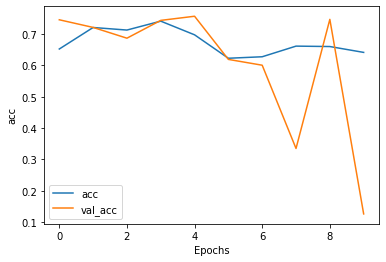

In [13]:
plot_graphs(history200, 'acc')

In [8]:
prediction = model.predict_classes(X_test_pad)
print(classification_report(prediction, test_label))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76     12527
           1       0.76      0.76      0.76     12473

    accuracy                           0.76     25000
   macro avg       0.76      0.76      0.76     25000
weighted avg       0.76      0.76      0.76     25000



This is one testing example which I used in the report for explaining gradient explosion in Vanilla RNN. It runs 100 epochs.

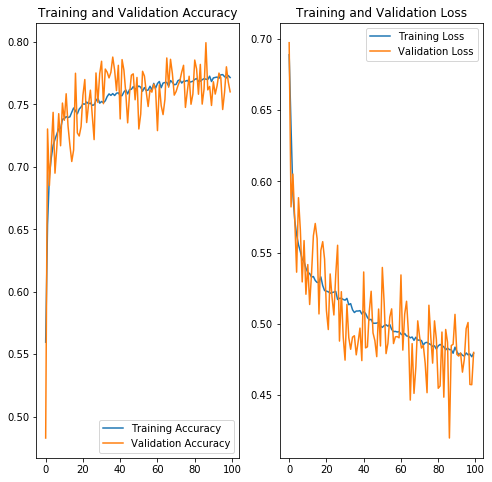

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()